In [1]:
import pandas as pd
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import optuna
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
from statsmodels.tsa.stattools import adfuller

C:\Users\cacho\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Read the Excel file into a DataFrame
df_ = pd.read_excel('C:/Users/cacho/Downloads/ExcelFiles/sorted_2011.xlsx')
df1 = pd.read_excel('C:/Users/cacho/Downloads/ExcelFiles/sorted_2012.xlsx')
df2 = pd.read_excel('C:/Users/cacho/Downloads/ExcelFiles/sorted_2013.xlsx')
df3 = pd.read_excel('C:/Users/cacho/Downloads/ExcelFiles/sorted_2014.xlsx')
df4 = pd.read_excel('C:/Users/cacho/Downloads/ExcelFiles/sorted_2015.xlsx')
df5 = pd.read_excel('C:/Users/cacho/Downloads/ExcelFiles/sorted_2016.xlsx')
df6 = pd.read_excel('C:/Users/cacho/Downloads/ExcelFiles/sorted_2017.xlsx')
df7 = pd.read_excel('C:/Users/cacho/Downloads/ExcelFiles/sorted_2018.xlsx')
df8 = pd.read_excel('C:/Users/cacho/Downloads/ExcelFiles/sorted_2019.xlsx')
df9 = pd.read_excel('C:/Users/cacho/Downloads/ExcelFiles/sorted_2020.xlsx')
df10 = pd.read_excel('C:/Users/cacho/Downloads/ExcelFiles/sorted_2021.xlsx')

# Concatenate all DataFrames into a single DataFrame
df = pd.concat([df_, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10], ignore_index=True)

# Display the merged DataFrame
df

,Pais,Mes,Valor Exportación (USD),Year
0,Argentina,1,"128,700",2011
1,Argentina,2,0,2011
2,Argentina,3,0,2011
3,Argentina,4,"38,667",2011
4,Argentina,5,"70,881",2011
...,...,...,...,...
734,India,7,"4,716",2021
735,India,8,0,2021
736,India,9,0,2021
737,India,10,583,2021


In [3]:
#Agregar nueva columna que contenga ambos valores
df['Full_Date'] = df['Year'].astype(str) + '/' + df['Mes'].astype(str).str.zfill(2)
# Reemplazar las comas por puntos en la columna de interés
df['Valor Exportación (USD)'] = df['Valor Exportación (USD)'].str.replace(',', '.')

# Convertir la columna a tipo float
df['Valor Exportación (USD)'] = df['Valor Exportación (USD)'].astype(float)

df['Year'] = df['Year'].astype(int)

# Ver los tipos de datos de las columnas en el DataFrame
print(df.dtypes)

Pais                        object
Mes                          int64
Valor Exportación (USD)    float64
Year                         int32
Full_Date                   object
dtype: object


### Visualizacion

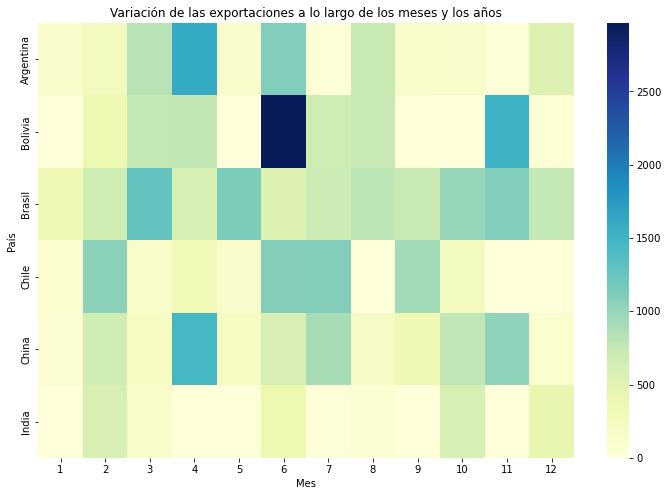

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un mapa de calor para visualizar la variación de las exportaciones a lo largo de los meses y los años
pivot_table = df.pivot_table(index='Pais', columns='Mes', values='Valor Exportación (USD)', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.xlabel('Mes')
plt.ylabel('País')
plt.title('Variación de las exportaciones a lo largo de los meses y los años')
plt.savefig('heatmap_exportaciones.png')  # Guardar la figura como un archivo PNG
plt.show()



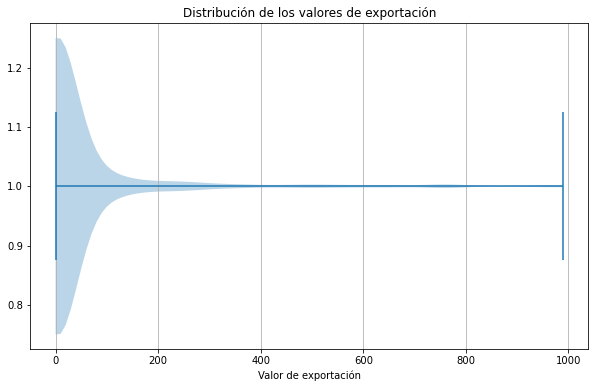

In [5]:
# Diagrama de violín para visualizar la distribución de los valores de exportación
plt.figure(figsize=(10, 6))
plt.violinplot(df['Valor Exportación (USD)'], vert=False)
plt.xlabel('Valor de exportación')
plt.title('Distribución de los valores de exportación')
plt.grid(axis='x')

# Guardar la figura como una imagen
plt.savefig('diagrama_violin_exportaciones.png')

plt.show()


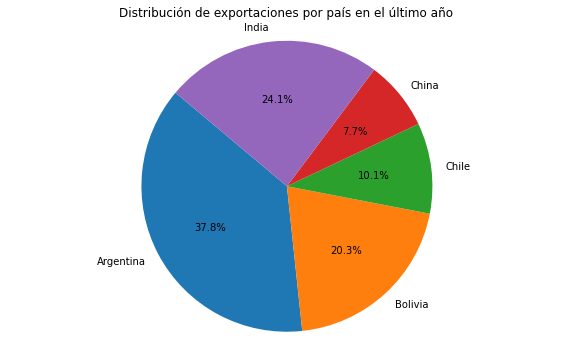

In [6]:
import matplotlib.pyplot as plt

# Filtrar el DataFrame para obtener los datos del último año
ultimo_ano = df['Year'].max()
datos_ultimo_ano = df[df['Year'] == ultimo_ano]

# Calcular la suma de exportaciones por país en el último año
suma_exportaciones_por_pais = datos_ultimo_ano.groupby('Pais')['Valor Exportación (USD)'].sum()

# Crear el gráfico circular o de pastel
plt.figure(figsize=(10, 6))
plt.pie(suma_exportaciones_por_pais, labels=suma_exportaciones_por_pais.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribución de exportaciones por país en el último año')

# Guardar el gráfico como una imagen
plt.savefig('distribucion_exportaciones_ultimo_ano.png')

plt.show()



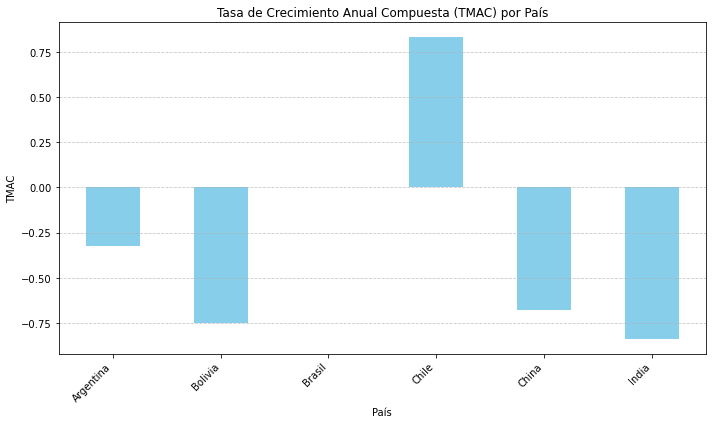

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar por el año 2021
filtro_anio = df[df['Year'] == 2021]  

# Obtener los índices de los valores máximos para cada país
indices_maximos = filtro_anio.groupby('Pais')['Valor Exportación (USD)'].idxmax()

# Seleccionar las filas correspondientes a los índices máximos
resultado = filtro_anio.loc[indices_maximos]

# Filtrar por el año 2011
filtro_anio1 = df[df['Year'] == 2011]  

# Obtener los índices de los valores máximos para cada país
indices_maximos1 = filtro_anio1.groupby('Pais')['Valor Exportación (USD)'].idxmax()

# Seleccionar las filas correspondientes a los índices máximos
resultado1 = filtro_anio1.loc[indices_maximos1]

# Suponiendo que ya tienes los DataFrames resultado y resultado1

# Combina los resultados en un solo DataFrame
resultado_final = pd.concat([resultado, resultado1])

# Calcular la TMAC para cada país en resultado_final
tmac_por_pais = resultado_final.groupby('Pais').apply(lambda x: (x['Valor Exportación (USD)'].iloc[-1] / x['Valor Exportación (USD)'].iloc[0]) ** (1 / len(x)) - 1)

# Crear la gráfica de barras para mostrar la TMAC por país
plt.figure(figsize=(10, 6))
tmac_por_pais.plot(kind='bar', color='skyblue')
plt.title('Tasa de Crecimiento Anual Compuesta (TMAC) por País')
plt.xlabel('País')
plt.ylabel('TMAC')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Guardar el gráfico como un archivo de imagen
plt.savefig('TMAC_por_pais.png')

plt.show()


### Modelado y rellenado de data

In [8]:
#Filtrar solo a bolivia
df_bolivia = df[df['Pais'] == 'Bolivia']

### Serie de tiempo

In [9]:
# Convertir la columna 'Full_Date' en datetime
df_bolivia['Full_Date'] = pd.to_datetime(df_bolivia['Full_Date'], format='%Y/%m')

# Establecer la columna 'Full_Date' como el índice
df_bolivia.set_index('Full_Date', inplace=True)

C:\Users\cacho\AppData\Local\Temp\ipykernel_12816\2001867224.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bolivia['Full_Date'] = pd.to_datetime(df_bolivia['Full_Date'], format='%Y/%m')


### Estacionaridad

In [10]:
# Realizar la prueba de Dickey-Fuller aumentada (ADF)
result = adfuller(df_bolivia['Valor Exportación (USD)'])

# Imprimir los resultados
print('Estadísticas ADF:', result[0])
print('Valor p:', result[1])
print('Valores críticos:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

Estadísticas ADF: -10.622499551941365
Valor p: 5.469656655002111e-19
Valores críticos:
	1%: -3.4816817173418295
	5%: -2.8840418343195267
	10%: -2.578770059171598


### ACF Y PACF

C:\Users\cacho\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


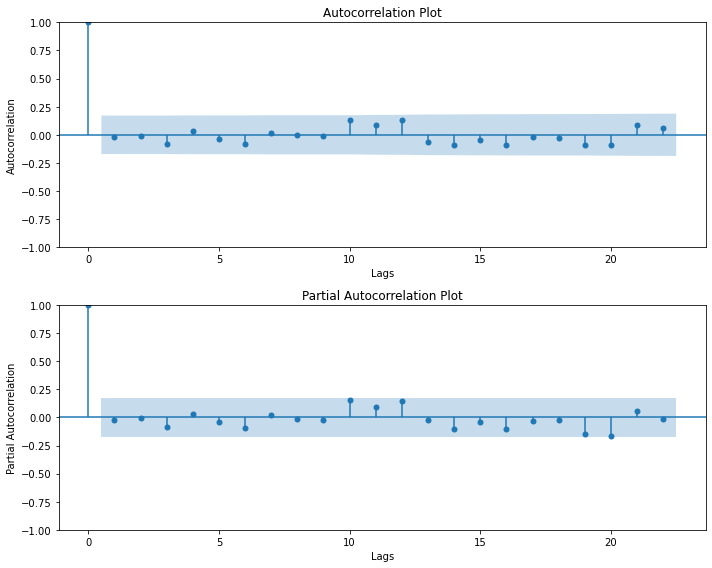

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Suponiendo que 'df_bolivia' es tu DataFrame de datos de Bolivia

# Seleccionar solo la columna 'Valor Exportación (USD)'
valor_exportacion = df_bolivia['Valor Exportación (USD)']

# Crear una figura con dos subgráficos
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Graficar la autocorrelación
plot_acf(valor_exportacion, ax=axes[0])
axes[0].set_xlabel('Lags')
axes[0].set_ylabel('Autocorrelation')
axes[0].set_title('Autocorrelation Plot')

# Graficar la autocorrelación parcial
plot_pacf(valor_exportacion, ax=axes[1])
axes[1].set_xlabel('Lags')
axes[1].set_ylabel('Partial Autocorrelation')
axes[1].set_title('Partial Autocorrelation Plot')

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()


### ARIMA + OPTUNA

[I 2024-03-12 19:10:55,271] A new study created in memory with name: no-name-2aeec62d-d82e-4e91-bd7e-6ff753a79f64
C:\Users\cacho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\cacho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\cacho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\cacho\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\cacho\an

Mejores parámetros encontrados: {'p': 9, 'd': 1, 'q': 5}


C:\Users\cacho\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


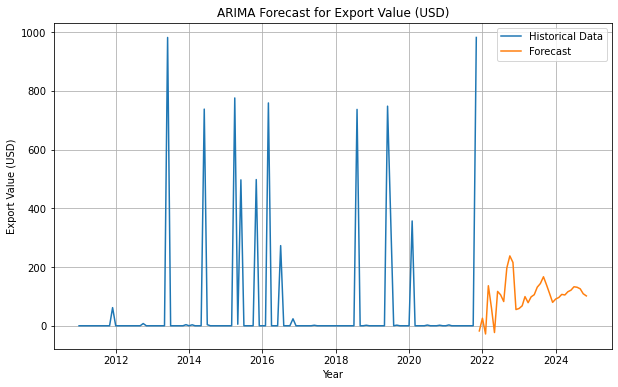

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def objective(trial):
    p = trial.suggest_int('p', 0, 10)
    d = trial.suggest_int('d', 0, 5)
    q = trial.suggest_int('q', 0, 5)

    # Seleccionar y ajustar un modelo ARIMA con los parámetros sugeridos
    model = ARIMA(df_bolivia['Valor Exportación (USD)'], order=(p, d, q))
    model_fit = model.fit()

    # Realizar la predicción
    forecast = model_fit.forecast(steps=12)

    # Calcular el Error Cuadrático Medio (RMSE)
    actual = df_bolivia['Valor Exportación (USD)'][-12:]
    rmse = np.sqrt(mean_squared_error(actual, forecast))
    
    # Calcular el Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((actual - forecast) / actual)) * 100

    return rmse

# Crear el estudio de Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Obtener los mejores parámetros del modelo
best_params = study.best_params
print("Mejores parámetros encontrados:", best_params)

# Seleccionar y ajustar un modelo ARIMA con los mejores parámetros encontrados
best_model = ARIMA(df_bolivia['Valor Exportación (USD)'], order=(best_params['p'], best_params['d'], best_params['q']))
best_model_fit = best_model.fit()

# Realizar la predicción con el mejor modelo
forecast = best_model_fit.forecast(steps=36)

# Visualizar la data histórica y el forecast
plt.figure(figsize=(10, 6))
plt.plot(df_bolivia.index, df_bolivia['Valor Exportación (USD)'], label='Historical Data')
plt.plot(forecast.index, forecast, label='Forecast')
plt.title("ARIMA Forecast for Export Value (USD)")
plt.xlabel("Year")
plt.ylabel("Export Value (USD)")
plt.legend()
plt.grid(True)
plt.show()


In [13]:
forecast

2021-12-01    -17.568265
2022-01-01     25.724525
2022-02-01    -27.961770
2022-03-01    136.377776
2022-04-01     60.811536
2022-05-01    -23.034493
2022-06-01    116.981472
2022-07-01    105.449032
2022-08-01     82.502202
2022-09-01    197.088794
2022-10-01    237.981387
2022-11-01    215.596508
2022-12-01     55.265263
2023-01-01     58.836518
2023-02-01     68.021477
2023-03-01     99.328012
2023-04-01     78.650463
2023-05-01     98.443988
2023-06-01    105.793647
2023-07-01    131.389174
2023-08-01    143.725282
2023-09-01    166.901065
2023-10-01    139.656678
2023-11-01    109.705828
2023-12-01     79.708561
2024-01-01     91.136542
2024-02-01     96.340556
2024-03-01    106.842612
2024-04-01    104.852109
2024-05-01    115.840257
2024-06-01    121.239610
2024-07-01    132.863607
2024-08-01    131.180372
2024-09-01    125.842779
2024-10-01    109.026382
2024-11-01    101.693808
Freq: MS, Name: predicted_mean, dtype: float64

### Residuos

C:\Users\cacho\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


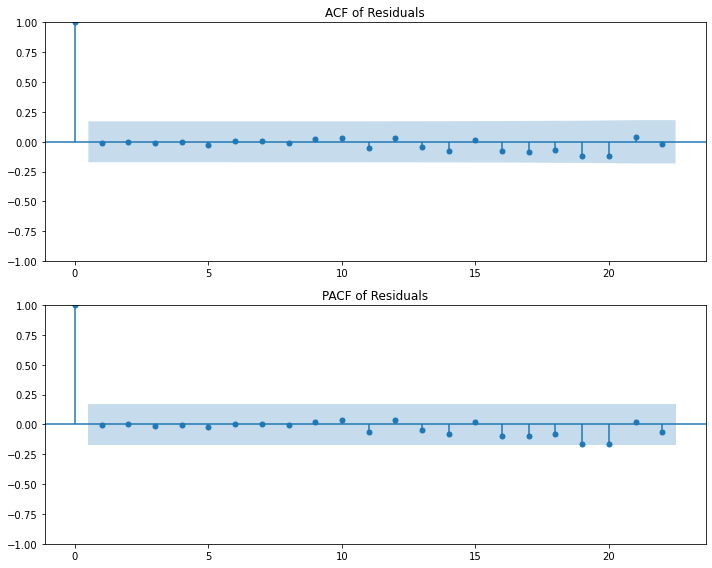

In [14]:
# Obtener los residuos del mejor modelo
residuals = best_model_fit.resid

# Graficar ACF y PACF de los residuos
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

plot_acf(residuals, ax=axes[0])
axes[0].set_title('ACF of Residuals')

plot_pacf(residuals, ax=axes[1])
axes[1].set_title('PACF of Residuals')

plt.tight_layout()
plt.show()

### Guardar data

In [15]:
# Crear un rango de fechas para el pronóstico que comience después de la última fecha en df_bolivia
last_date = df_bolivia.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=len(forecast), freq='MS')

# Crear un DataFrame para el pronóstico con las fechas correctas
forecast_df = pd.DataFrame({'Valor Exportación (USD)': forecast}, index=forecast_dates)

# Concatenar df_bolivia y forecast_df
df_bolivia_forecast = pd.concat([df_bolivia, forecast_df])

# Visualizar el DataFrame combinado
df_bolivia_forecast


,Pais,Mes,Valor Exportación (USD),Year
2011-01-01,Bolivia,1.0,0.000000,2011.0
2011-02-01,Bolivia,2.0,0.000000,2011.0
2011-03-01,Bolivia,3.0,0.000000,2011.0
2011-04-01,Bolivia,4.0,0.000000,2011.0
2011-05-01,Bolivia,5.0,0.000000,2011.0
...,...,...,...,...
2024-07-01,NaN,NaN,132.863607,NaN
2024-08-01,NaN,NaN,131.180372,NaN
2024-09-01,NaN,NaN,125.842779,NaN
2024-10-01,NaN,NaN,109.026382,NaN


### CHILE

In [16]:
#Filtrar solo a bolivia
df_chile = df[df['Pais'] == 'Chile']

### SERIES DE TIEMPO

In [17]:
# Convertir la columna 'Full_Date' en datetime
df_chile['Full_Date'] = pd.to_datetime(df_chile['Full_Date'], format='%Y/%m')

# Establecer la columna 'Full_Date' como el índice
df_chile.set_index('Full_Date', inplace=True)

C:\Users\cacho\AppData\Local\Temp\ipykernel_12816\1378794378.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chile['Full_Date'] = pd.to_datetime(df_chile['Full_Date'], format='%Y/%m')


### ESTACIONARIDAD

In [18]:
# Realizar la prueba de Dickey-Fuller aumentada (ADF)
result = adfuller(df_chile['Valor Exportación (USD)'])

# Imprimir los resultados
print('Estadísticas ADF:', result[0])
print('Valor p:', result[1])
print('Valores críticos:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

Estadísticas ADF: -2.552874289797277
Valor p: 0.10313350704538854
Valores críticos:
	1%: -3.485585145896754
	5%: -2.885738566292665
	10%: -2.5796759080663887


### ACF Y PACF

C:\Users\cacho\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


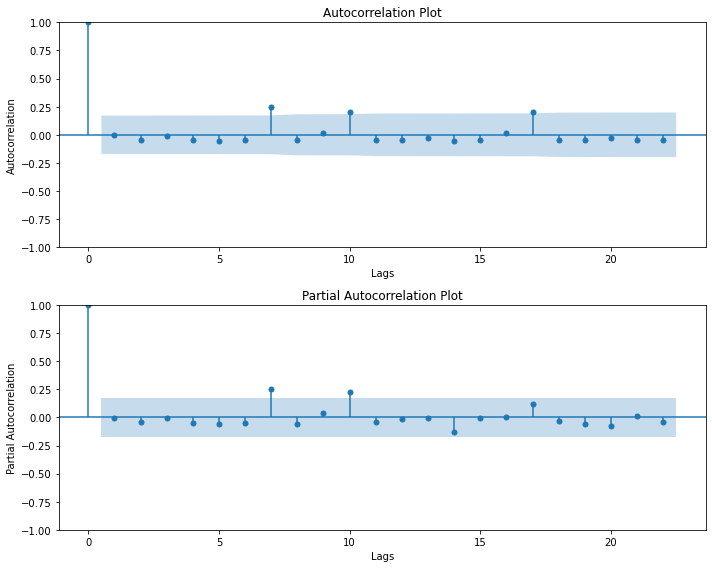

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Suponiendo que 'df_bolivia' es tu DataFrame de datos de Bolivia

# Seleccionar solo la columna 'Valor Exportación (USD)'
valor_exportacion1 = df_chile['Valor Exportación (USD)']

# Crear una figura con dos subgráficos
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Graficar la autocorrelación
plot_acf(valor_exportacion1, ax=axes[0])
axes[0].set_xlabel('Lags')
axes[0].set_ylabel('Autocorrelation')
axes[0].set_title('Autocorrelation Plot')

# Graficar la autocorrelación parcial
plot_pacf(valor_exportacion1, ax=axes[1])
axes[1].set_xlabel('Lags')
axes[1].set_ylabel('Partial Autocorrelation')
axes[1].set_title('Partial Autocorrelation Plot')

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()


### ARIMA + OPTUNA

[I 2024-03-12 19:12:33,834] A new study created in memory with name: no-name-d77fa00f-a21b-4f86-af7e-28a0ae8c330f
C:\Users\cacho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\cacho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\cacho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\cacho\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\cacho\an

Mejores parámetros encontrados: {'p': 0, 'd': 0, 'q': 0}


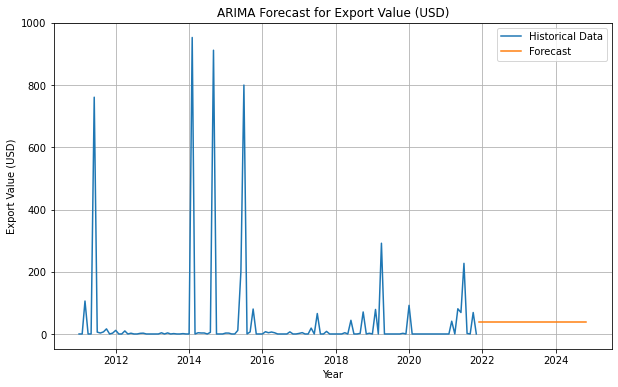

In [20]:
def objective(trial):
    p = trial.suggest_int('p', 0, 10)
    d = trial.suggest_int('d', 0, 5)
    q = trial.suggest_int('q', 0, 5)

    # Seleccionar y ajustar un modelo ARIMA con los parámetros sugeridos
    model = ARIMA(df_chile['Valor Exportación (USD)'], order=(p, d, q))
    model_fit = model.fit()

    # Realizar la predicción
    forecast = model_fit.forecast(steps=12)

    # Calcular el Error Cuadrático Medio (RMSE)
    rmse = np.sqrt(mean_squared_error(df_chile['Valor Exportación (USD)'][-12:], forecast))

    return rmse

# Crear el estudio de Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Obtener los mejores parámetros del modelo
best_params = study.best_params
print("Mejores parámetros encontrados:", best_params)

# Seleccionar y ajustar un modelo ARIMA con los mejores parámetros encontrados
best_model = ARIMA(df_chile['Valor Exportación (USD)'], order=(best_params['p'], best_params['d'], best_params['q']))
best_model_fit = best_model.fit()

# Realizar la predicción con el mejor modelo
forecast = best_model_fit.forecast(steps=36)

# Visualizar la data histórica y el forecast
plt.figure(figsize=(10, 6))
plt.plot(df_chile.index, df_chile['Valor Exportación (USD)'], label='Historical Data')
plt.plot(forecast.index, forecast, label='Forecast')
plt.title("ARIMA Forecast for Export Value (USD)")
plt.xlabel("Year")
plt.ylabel("Export Value (USD)")
plt.legend()
plt.grid(True)
plt.show()


### Residuos

C:\Users\cacho\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


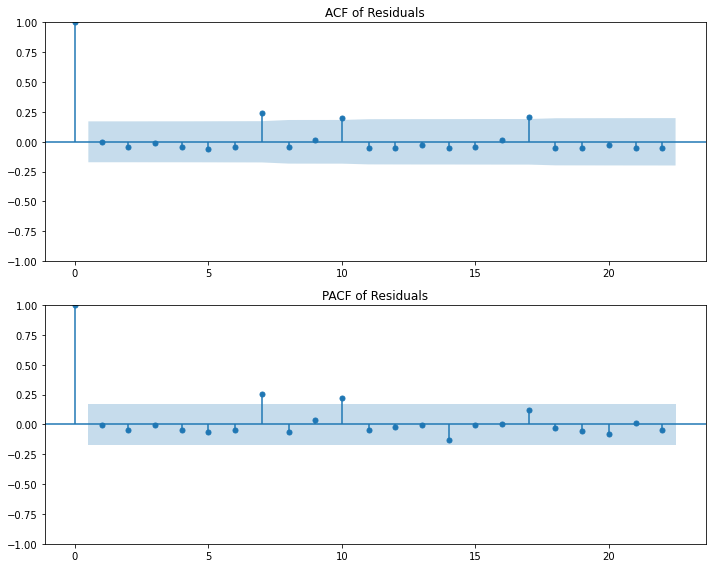

In [21]:
# Obtener los residuos del mejor modelo
residuals = best_model_fit.resid

# Graficar ACF y PACF de los residuos
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

plot_acf(residuals, ax=axes[0])
axes[0].set_title('ACF of Residuals')

plot_pacf(residuals, ax=axes[1])
axes[1].set_title('PACF of Residuals')

plt.tight_layout()
plt.show()

### Guardar data

In [22]:
# Crear un rango de fechas para el pronóstico que comience después de la última fecha en df_chile
last_date = df_chile.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=len(forecast), freq='MS')

# Crear un DataFrame para el pronóstico con las fechas correctas
forecast_df = pd.DataFrame({'Valor Exportación (USD)': forecast}, index=forecast_dates)

# Concatenar df_chile y forecast_df
df_chile_forecast = pd.concat([df_chile, forecast_df])

# Visualizar el DataFrame combinado
df_chile_forecast


,Pais,Mes,Valor Exportación (USD),Year
2011-01-01,Chile,1.0,0.000000,2011.0
2011-02-01,Chile,2.0,0.000000,2011.0
2011-03-01,Chile,3.0,105.870000,2011.0
2011-04-01,Chile,4.0,0.000000,2011.0
2011-05-01,Chile,5.0,0.000000,2011.0
...,...,...,...,...
2024-07-01,NaN,NaN,39.143623,NaN
2024-08-01,NaN,NaN,39.143623,NaN
2024-09-01,NaN,NaN,39.143623,NaN
2024-10-01,NaN,NaN,39.143623,NaN


### BRASIL

In [23]:
#Filtrar solo a bolivia
df_brasil = df[df['Pais'] == 'Brasil']

### SERIES DE TIEMPO

In [24]:
# Convertir la columna 'Full_Date' en datetime
df_brasil['Full_Date'] = pd.to_datetime(df_brasil['Full_Date'], format='%Y/%m')

# Establecer la columna 'Full_Date' como el índice
df_brasil.set_index('Full_Date', inplace=True)

C:\Users\cacho\AppData\Local\Temp\ipykernel_12816\3018182729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brasil['Full_Date'] = pd.to_datetime(df_brasil['Full_Date'], format='%Y/%m')


### Estacionaridad 

In [25]:
# Realizar la prueba de Dickey-Fuller aumentada (ADF)
result = adfuller(df_brasil['Valor Exportación (USD)'])

# Imprimir los resultados
print('Estadísticas ADF:', result[0])
print('Valor p:', result[1])
print('Valores críticos:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

Estadísticas ADF: -2.9107626560080355
Valor p: 0.04411068544008645
Valores críticos:
	1%: -3.487517288664615
	5%: -2.8865777180380032
	10%: -2.5801239192052012


### ACF Y PACF

C:\Users\cacho\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


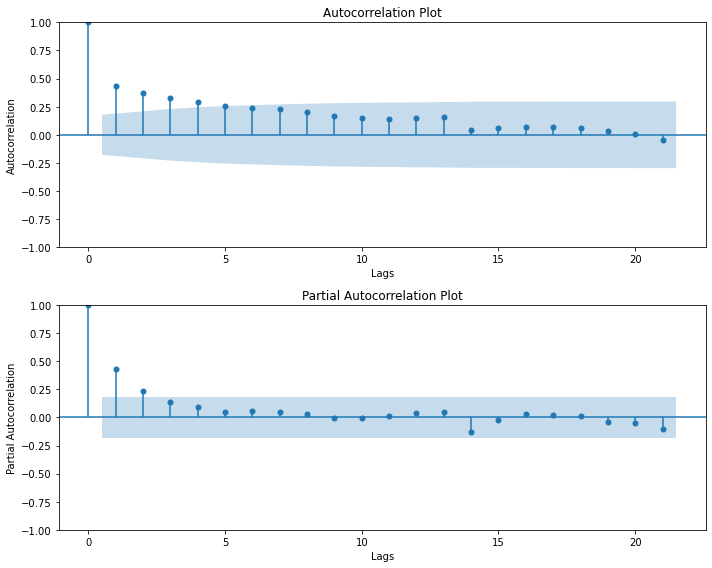

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Suponiendo que 'df_bolivia' es tu DataFrame de datos de Bolivia

# Seleccionar solo la columna 'Valor Exportación (USD)'
valor_exportacion2 = df_brasil['Valor Exportación (USD)']

# Crear una figura con dos subgráficos
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Graficar la autocorrelación
plot_acf(valor_exportacion2, ax=axes[0])
axes[0].set_xlabel('Lags')
axes[0].set_ylabel('Autocorrelation')
axes[0].set_title('Autocorrelation Plot')

# Graficar la autocorrelación parcial
plot_pacf(valor_exportacion2, ax=axes[1])
axes[1].set_xlabel('Lags')
axes[1].set_ylabel('Partial Autocorrelation')
axes[1].set_title('Partial Autocorrelation Plot')

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

### ARIMA + OPTUNA

[I 2024-03-12 19:13:02,279] A new study created in memory with name: no-name-89504501-8bf1-45f3-ba8a-6b194986dd11
C:\Users\cacho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\cacho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\cacho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
[I 2024-03-12 19:13:02,320] Trial 0 finished with value: 119.04161127381747 and parameters: {'p': 0, 'd': 1, 'q': 0}. Best is trial 0 with value: 119.04161127381747.
C:\Users\cacho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No fre

Mejores parámetros encontrados: {'p': 9, 'd': 1, 'q': 3}


C:\Users\cacho\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


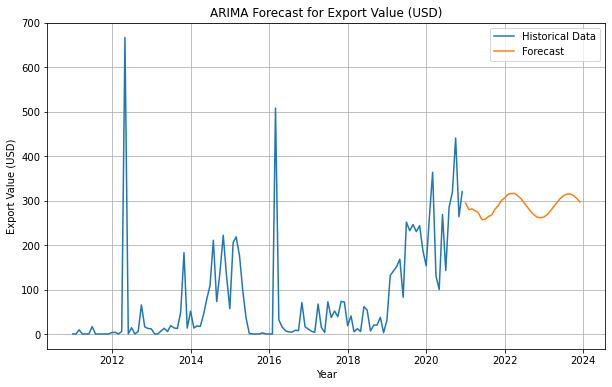

In [27]:
def objective(trial):
    p = trial.suggest_int('p', 0, 10)
    d = trial.suggest_int('d', 0, 5)
    q = trial.suggest_int('q', 0, 5)

    # Seleccionar y ajustar un modelo ARIMA con los parámetros sugeridos
    model = ARIMA(df_brasil['Valor Exportación (USD)'], order=(p, d, q))
    model_fit = model.fit()

    # Realizar la predicción
    forecast = model_fit.forecast(steps=12)

    # Calcular el Error Cuadrático Medio (RMSE)
    rmse = np.sqrt(mean_squared_error(df_brasil['Valor Exportación (USD)'][-12:], forecast))

    return rmse

# Crear el estudio de Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Obtener los mejores parámetros del modelo
best_params = study.best_params
print("Mejores parámetros encontrados:", best_params)

# Seleccionar y ajustar un modelo ARIMA con los mejores parámetros encontrados
best_model = ARIMA(df_brasil['Valor Exportación (USD)'], order=(best_params['p'], best_params['d'], best_params['q']))
best_model_fit = best_model.fit()

# Realizar la predicción con el mejor modelo
forecast = best_model_fit.forecast(steps=36)

# Visualizar la data histórica y el forecast
plt.figure(figsize=(10, 6))
plt.plot(df_brasil.index, df_brasil['Valor Exportación (USD)'], label='Historical Data')
plt.plot(forecast.index, forecast, label='Forecast')
plt.title("ARIMA Forecast for Export Value (USD)")
plt.xlabel("Year")
plt.ylabel("Export Value (USD)")
plt.legend()
plt.grid(True)
plt.show()


### RESIDUOS

C:\Users\cacho\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


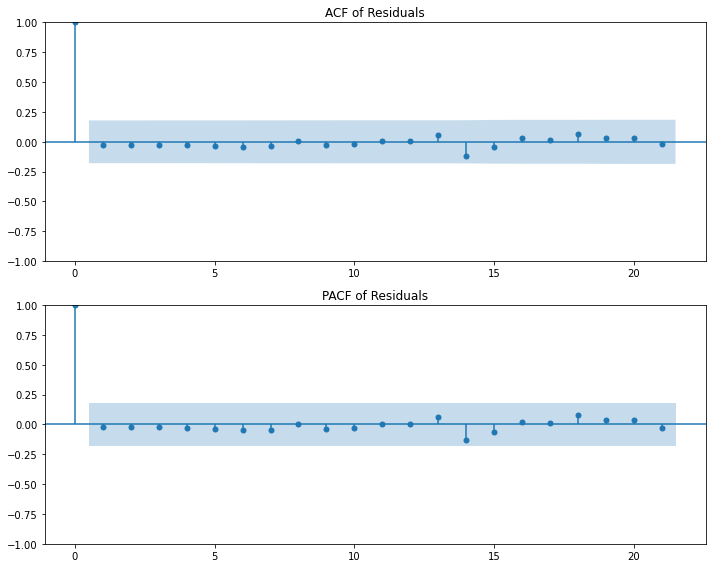

In [28]:
# Obtener los residuos del mejor modelo
residuals = best_model_fit.resid

# Graficar ACF y PACF de los residuos
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

plot_acf(residuals, ax=axes[0])
axes[0].set_title('ACF of Residuals')

plot_pacf(residuals, ax=axes[1])
axes[1].set_title('PACF of Residuals')

plt.tight_layout()
plt.show()

### Guardar data

In [29]:
# Crear un rango de fechas para el pronóstico que comience después de la última fecha en df_brasil
last_date = df_brasil.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=len(forecast), freq='MS')

# Crear un DataFrame para el pronóstico con las fechas correctas
forecast_df = pd.DataFrame({'Valor Exportación (USD)': forecast}, index=forecast_dates)

# Concatenar df_brasil y forecast_df
df_brasil_forecast = pd.concat([df_brasil, forecast_df])

# Visualizar el DataFrame combinado
df_brasil_forecast

,Pais,Mes,Valor Exportación (USD),Year
2011-01-01,Brasil,1.0,0.000000,2011.0
2011-02-01,Brasil,2.0,0.000000,2011.0
2011-03-01,Brasil,3.0,9.365000,2011.0
2011-04-01,Brasil,4.0,0.000000,2011.0
2011-05-01,Brasil,5.0,0.000000,2011.0
...,...,...,...,...
2023-08-01,NaN,NaN,314.763913,NaN
2023-09-01,NaN,NaN,314.742336,NaN
2023-10-01,NaN,NaN,311.525881,NaN
2023-11-01,NaN,NaN,305.141431,NaN


### CHINA

In [30]:
#Filtrar solo a bolivia
df_china = df[df['Pais'] == 'China']

### Serie de tiempo

In [31]:
# Convertir la columna 'Full_Date' en datetime
df_china['Full_Date'] = pd.to_datetime(df_china['Full_Date'], format='%Y/%m')

# Establecer la columna 'Full_Date' como el índice
df_china.set_index('Full_Date', inplace=True)

C:\Users\cacho\AppData\Local\Temp\ipykernel_12816\3337074282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_china['Full_Date'] = pd.to_datetime(df_china['Full_Date'], format='%Y/%m')


### Estacionaridad

In [32]:
# Realizar la prueba de Dickey-Fuller aumentada (ADF)
result = adfuller(df_china['Valor Exportación (USD)'])

# Imprimir los resultados
print('Estadísticas ADF:', result[0])
print('Valor p:', result[1])
print('Valores críticos:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

Estadísticas ADF: -9.960493548730733
Valor p: 2.380754441707139e-17
Valores críticos:
	1%: -3.4816817173418295
	5%: -2.8840418343195267
	10%: -2.578770059171598


### ACF Y PACF

C:\Users\cacho\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


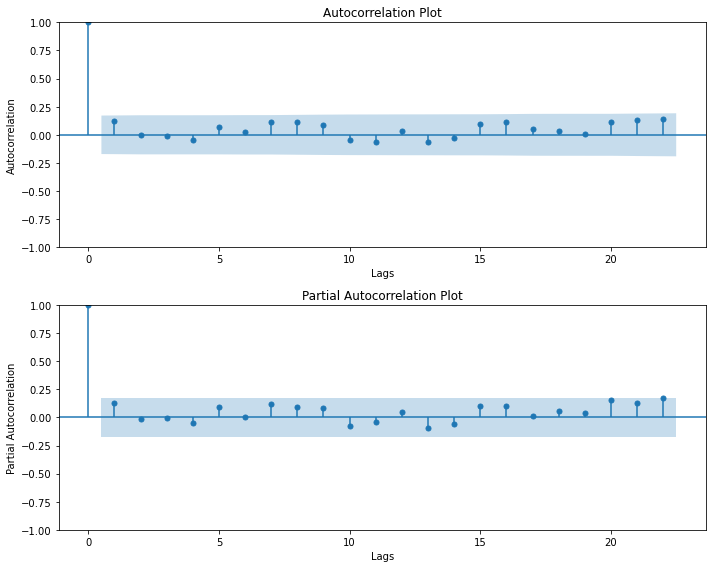

In [33]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Suponiendo que 'df_bolivia' es tu DataFrame de datos de Bolivia

# Seleccionar solo la columna 'Valor Exportación (USD)'
valor_exportacion5 = df_china['Valor Exportación (USD)']

# Crear una figura con dos subgráficos
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Graficar la autocorrelación
plot_acf(valor_exportacion5, ax=axes[0])
axes[0].set_xlabel('Lags')
axes[0].set_ylabel('Autocorrelation')
axes[0].set_title('Autocorrelation Plot')

# Graficar la autocorrelación parcial
plot_pacf(valor_exportacion5, ax=axes[1])
axes[1].set_xlabel('Lags')
axes[1].set_ylabel('Partial Autocorrelation')
axes[1].set_title('Partial Autocorrelation Plot')

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

### ARIMA + OPTUNA

[I 2024-03-12 19:14:15,410] A new study created in memory with name: no-name-61b9c928-926e-4d3d-929a-d17bb59f13b7
C:\Users\cacho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\cacho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\cacho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\cacho\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\cacho\an

Mejores parámetros encontrados: {'p': 10, 'd': 1, 'q': 0}


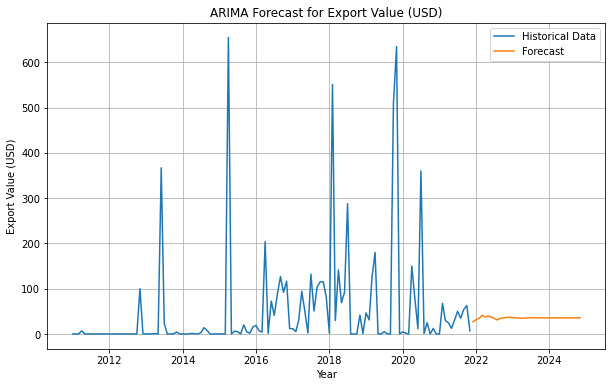

In [34]:
def objective(trial):
    p = trial.suggest_int('p', 0, 10)
    d = trial.suggest_int('d', 0, 5)
    q = trial.suggest_int('q', 0, 5)

    # Seleccionar y ajustar un modelo ARIMA con los parámetros sugeridos
    model = ARIMA(df_china['Valor Exportación (USD)'], order=(p, d, q))
    model_fit = model.fit()

    # Realizar la predicción
    forecast = model_fit.forecast(steps=12)

    # Calcular el Error Cuadrático Medio (RMSE)
    rmse = np.sqrt(mean_squared_error(df_china['Valor Exportación (USD)'][-12:], forecast))

    return rmse

# Crear el estudio de Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Obtener los mejores parámetros del modelo
best_params = study.best_params
print("Mejores parámetros encontrados:", best_params)

# Seleccionar y ajustar un modelo ARIMA con los mejores parámetros encontrados
best_model = ARIMA(df_china['Valor Exportación (USD)'], order=(best_params['p'], best_params['d'], best_params['q']))
best_model_fit = best_model.fit()

# Realizar la predicción con el mejor modelo
forecast = best_model_fit.forecast(steps=36)

# Visualizar la data histórica y el forecast
plt.figure(figsize=(10, 6))
plt.plot(df_china.index, df_china['Valor Exportación (USD)'], label='Historical Data')
plt.plot(forecast.index, forecast, label='Forecast')
plt.title("ARIMA Forecast for Export Value (USD)")
plt.xlabel("Year")
plt.ylabel("Export Value (USD)")
plt.legend()
plt.grid(True)
plt.show()


In [35]:
forecast

2021-12-01    27.128450
2022-01-01    31.597346
2022-02-01    34.503301
2022-03-01    41.184632
2022-04-01    37.543513
2022-05-01    39.550346
2022-06-01    37.446992
2022-07-01    34.231716
2022-08-01    30.958831
2022-09-01    34.715979
2022-10-01    35.538374
2022-11-01    36.481503
2022-12-01    37.142246
2023-01-01    36.040904
2023-02-01    36.072420
2023-03-01    35.062472
2023-04-01    34.840710
2023-05-01    35.079976
2023-06-01    35.645111
2023-07-01    35.888043
2023-08-01    35.924896
2023-09-01    35.850227
2023-10-01    35.584616
2023-11-01    35.513568
2023-12-01    35.399081
2024-01-01    35.484926
2024-02-01    35.603033
2024-03-01    35.678177
2024-04-01    35.699587
2024-05-01    35.654923
2024-06-01    35.610471
2024-07-01    35.563945
2024-08-01    35.561101
2024-09-01    35.572101
2024-10-01    35.603724
2024-11-01    35.625090
Freq: MS, Name: predicted_mean, dtype: float64

### RESIDUOS

C:\Users\cacho\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


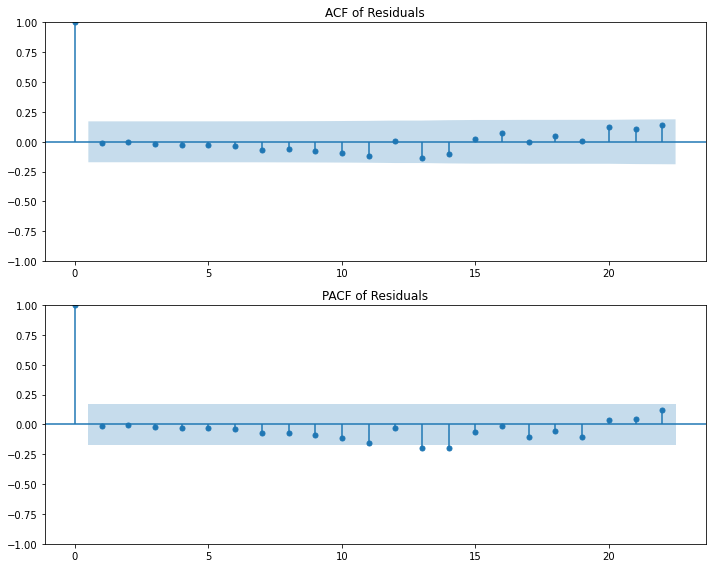

In [36]:
# Obtener los residuos del mejor modelo
residuals = best_model_fit.resid

# Graficar ACF y PACF de los residuos
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

plot_acf(residuals, ax=axes[0])
axes[0].set_title('ACF of Residuals')

plot_pacf(residuals, ax=axes[1])
axes[1].set_title('PACF of Residuals')

plt.tight_layout()
plt.show()

### Guardar data

In [37]:
# Crear un rango de fechas para el pronóstico que comience después de la última fecha en df_china
last_date = df_china.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=len(forecast), freq='MS')

# Crear un DataFrame para el pronóstico con las fechas correctas
forecast_df = pd.DataFrame({'Valor Exportación (USD)': forecast}, index=forecast_dates)

# Concatenar df_china y forecast_df
df_china_forecast = pd.concat([df_china, forecast_df])

# Visualizar el DataFrame combinado
df_china_forecast

,Pais,Mes,Valor Exportación (USD),Year
2011-01-01,China,1.0,0.000000,2011.0
2011-02-01,China,2.0,0.000000,2011.0
2011-03-01,China,3.0,0.000000,2011.0
2011-04-01,China,4.0,7.000000,2011.0
2011-05-01,China,5.0,0.000000,2011.0
...,...,...,...,...
2024-07-01,NaN,NaN,35.563945,NaN
2024-08-01,NaN,NaN,35.561101,NaN
2024-09-01,NaN,NaN,35.572101,NaN
2024-10-01,NaN,NaN,35.603724,NaN


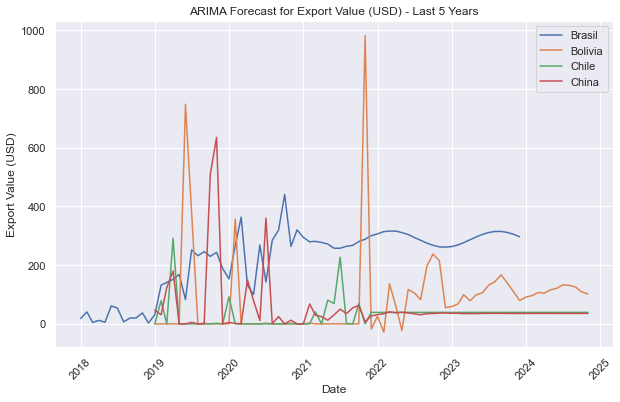

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar los últimos 5 años de datos para Brasil
df_brasil_forecast_last_5_years = df_brasil_forecast[df_brasil_forecast.index.year >= df_brasil_forecast.index.year[-1] - 5]

# Filtrar los últimos 5 años de datos para Bolivia
df_bolivia_forecast_last_5_years = df_bolivia_forecast[df_bolivia_forecast.index.year >= df_bolivia_forecast.index.year[-1] - 5]

# Filtrar los últimos 5 años de datos para Chile
df_chile_forecast_last_5_years = df_chile_forecast[df_chile_forecast.index.year >= df_chile_forecast.index.year[-1] - 5]

# Filtrar los últimos 5 años de datos para China
df_china_forecast_last_5_years = df_china_forecast[df_china_forecast.index.year >= df_china_forecast.index.year[-1] - 5]

# Configurar el estilo de Seaborn
sns.set(style="darkgrid")

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Graficar los datos históricos y los pronósticos para Brasil
sns.lineplot(x=df_brasil_forecast_last_5_years.index, y=df_brasil_forecast_last_5_years['Valor Exportación (USD)'], label='Brasil')

# Graficar los datos históricos y los pronósticos para Bolivia
sns.lineplot(x=df_bolivia_forecast_last_5_years.index, y=df_bolivia_forecast_last_5_years['Valor Exportación (USD)'], label='Bolivia')

# Graficar los datos históricos y los pronósticos para Chile
sns.lineplot(x=df_chile_forecast_last_5_years.index, y=df_chile_forecast_last_5_years['Valor Exportación (USD)'], label='Chile')

# Graficar los datos históricos y los pronósticos para China
sns.lineplot(x=df_china_forecast_last_5_years.index, y=df_china_forecast_last_5_years['Valor Exportación (USD)'], label='China')

# Configurar título y etiquetas de los ejes
plt.title("ARIMA Forecast for Export Value (USD) - Last 5 Years")
plt.xlabel("Date")
plt.ylabel("Export Value (USD)")

# Mostrar leyenda
plt.legend()

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


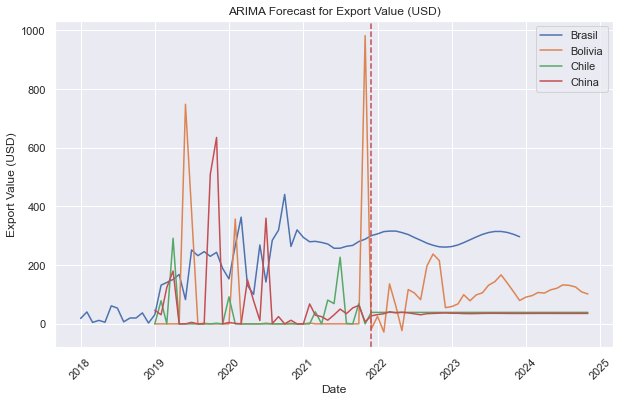

<Figure size 432x288 with 0 Axes>

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar los últimos 5 años de datos para Brasil
df_brasil_forecast_last_5_years = df_brasil_forecast[df_brasil_forecast.index.year >= df_brasil_forecast.index.year[-1] - 5]

# Filtrar los últimos 5 años de datos para Bolivia
df_bolivia_forecast_last_5_years = df_bolivia_forecast[df_bolivia_forecast.index.year >= df_bolivia_forecast.index.year[-1] - 5]

# Filtrar los últimos 5 años de datos para Chile
df_chile_forecast_last_5_years = df_chile_forecast[df_chile_forecast.index.year >= df_chile_forecast.index.year[-1] - 5]

# Filtrar los últimos 5 años de datos para China
df_china_forecast_last_5_years = df_china_forecast[df_china_forecast.index.year >= df_china_forecast.index.year[-1] - 5]

# Configurar el estilo de Seaborn
sns.set(style="darkgrid")

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Graficar los datos históricos y los pronósticos para Brasil
sns.lineplot(x=df_brasil_forecast_last_5_years.index, y=df_brasil_forecast_last_5_years['Valor Exportación (USD)'], label='Brasil')

# Graficar los datos históricos y los pronósticos para Bolivia
sns.lineplot(x=df_bolivia_forecast_last_5_years.index, y=df_bolivia_forecast_last_5_years['Valor Exportación (USD)'], label='Bolivia')

# Graficar los datos históricos y los pronósticos para Chile
sns.lineplot(x=df_chile_forecast_last_5_years.index, y=df_chile_forecast_last_5_years['Valor Exportación (USD)'], label='Chile')

# Graficar los datos históricos y los pronósticos para China
sns.lineplot(x=df_china_forecast_last_5_years.index, y=df_china_forecast_last_5_years['Valor Exportación (USD)'], label='China')

# Agregar línea vertical punteada roja a partir de 2023
plt.axvline(x=pd.to_datetime('2021-12-01'), color='r', linestyle='--')

# Configurar título y etiquetas de los ejes
plt.title("ARIMA Forecast for Export Value (USD)")
plt.xlabel("Date")
plt.ylabel("Export Value (USD)")

# Mostrar leyenda
plt.legend()

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

# Guardar el gráfico como PNG
plt.savefig('export_forecast_plot.png')


In [40]:
# Mostrar el gráfico
plt.show()

# Guardar el gráfico como PNG
plt.savefig('export_forecast_plot.png')

<Figure size 432x288 with 0 Axes>

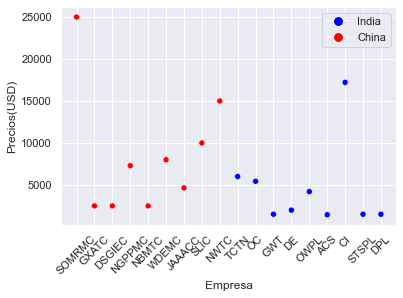

<Figure size 432x288 with 0 Axes>

In [41]:
# Cargar el DataFrame desde el archivo Excel
df44 = pd.read_excel('C:/Users/cacho/Downloads/Precios de competidores.xlsx')

# Crear un diccionario con los colores asignados a todas las empresas
empresas_colores = {
    'TCTN': 'blue',
    'OC': 'blue',
    'GWT': 'blue',
    'DE': 'blue',
    'OWPL': 'blue',
    'ACS': 'blue',
    'CI': 'blue',
    'STSPL': 'blue',
    'DPL': 'blue',
    'SOMRMC': 'red',
    'GXATC': 'red',
    'DSGIEC': 'red',
    'NGPPMC': 'red',
    'NBMTC': 'red',
    'WDEMC': 'red',
    'JAAACC': 'red',
    'SLIC': 'red',
    'NWTC': 'red',
    'India': 'blue',
    'China': 'red',# Agregar China con color rojo
}

# Crear el gráfico de dispersión con colores diferentes para cada empresa
sns.scatterplot(x='Empresa', y='Precios(USD)', data=df44, hue='Empresa', palette=empresas_colores)

# Rotar las etiquetas del eje x para mayor legibilidad si es necesario
plt.xticks(rotation=45)

# Agregar leyenda manualmente
legend_labels = ['India','China' ]  # Definir las etiquetas de la leyenda
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in empresas_colores.items() if label in legend_labels]  # Crear handles para la leyenda
plt.legend(handles=legend_handles, labels=legend_labels)

# Mostrar el gráfico
plt.show()

# Guardar el gráfico como PNG
plt.savefig('disp_precios_plot.png')
